In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras

# Intrusion Detection Evaluation Dataset (CIC-IDS2017)
### Infiltration Attack Data

Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) are the most important defense tools against the sophisticated and ever-growing network attacks. Due to the lack of reliable test and validation datasets, anomaly-based intrusion detection approaches are suffering from consistent and accurate performance evolutions.

[https://www.unb.ca/cic/datasets/ids-2017.html]


In [40]:
# Load Data
df = pd.read_csv("data/CICIDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
X = df

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             288602 non-null  int64  
 1    Flow Duration                288602 non-null  int64  
 2    Total Fwd Packets            288602 non-null  int64  
 3    Total Backward Packets       288602 non-null  int64  
 4   Total Length of Fwd Packets   288602 non-null  int64  
 5    Total Length of Bwd Packets  288602 non-null  int64  
 6    Fwd Packet Length Max        288602 non-null  int64  
 7    Fwd Packet Length Min        288602 non-null  int64  
 8    Fwd Packet Length Mean       288602 non-null  float64
 9    Fwd Packet Length Std        288602 non-null  float64
 10  Bwd Packet Length Max         288602 non-null  int64  
 11   Bwd Packet Length Min        288602 non-null  int64  
 12   Bwd Packet Length Mean       288602 non-nul

In [42]:
X[' Label'].unique()

array(['BENIGN', 'Infiltration'], dtype=object)

In [43]:
X.replace('BENIGN', 0, inplace=True)
X.replace('Infiltration', 1, inplace=True)

In [44]:
X[' Label'].unique()

array([0, 1])

In [45]:
# Clean Data
if(np.any(np.isnan(X)) or np.all(np.isfinite(X))):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep]

X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,0
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,0
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,0
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,0
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,0


In [46]:
# Scale Data
scaled_features = MinMaxScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.000336,1.400001e-06,0.00000,0.000022,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.917828,7.083337e-07,0.00000,0.000045,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.001877,8.329088e-04,0.00000,0.000022,0.000004,7.547170e-07,0.002055,0.023245,0.011119,0.0,...,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.001877,3.084918e-04,0.00000,0.000022,0.000004,7.547170e-07,0.002055,0.023245,0.011119,0.0,...,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,9.263450e-01,0.00644,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.026898,0.055727,0.060973,0.000001,0.078859,0.035295,0.113333,0.047502,0.0


In [47]:
y_label = X.pop(' Label')
y_label.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name:  Label, dtype: float64

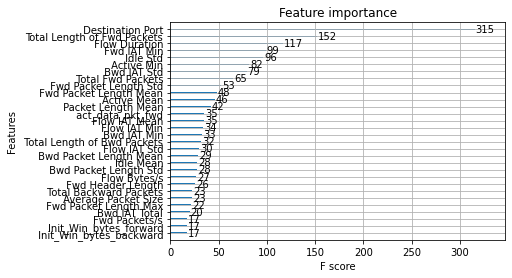

In [48]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt

mod = xgb.XGBRegressor(objective ='reg:squarederror',max_depth = 5, n_estimators = 600)
mod.fit(X, y_label)
plot_importance(mod, max_num_features=30)
plt.show()

In [49]:
# Important Features
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
reg = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the regressor
reg.fit(X, y_label)

x = {}
# Print the name and gini importance of each feature
for feature in zip(list(X.columns), reg.feature_importances_):
    print(feature)
    x[feature[0]] = feature[1]

(' Destination Port', 0.24788528104551824)
(' Flow Duration', 0.00922141946560046)
(' Total Fwd Packets', 0.009383021275890902)
(' Total Backward Packets', 0.008240202923123316)
('Total Length of Fwd Packets', 0.11400117174856506)
(' Total Length of Bwd Packets', 0.009704557115296497)
(' Fwd Packet Length Max', 0.009905906808156038)
(' Fwd Packet Length Min', 0.0035738080210766378)
(' Fwd Packet Length Mean', 0.009517610955672438)
(' Fwd Packet Length Std', 0.01121226085838972)
('Bwd Packet Length Max', 0.02069886541296333)
(' Bwd Packet Length Min', 0.005200201189205755)
(' Bwd Packet Length Mean', 0.043112724435755805)
(' Bwd Packet Length Std', 0.0032975004365784813)
('Flow Bytes/s', 0.007908253968846854)
(' Flow Packets/s', 0.012765226394500718)
(' Flow IAT Mean', 0.011582998642121188)
(' Flow IAT Std', 0.0028020275344846695)
(' Flow IAT Max', 0.003556975728112012)
(' Flow IAT Min', 0.004016415201127054)
('Fwd IAT Total', 0.011079165151950378)
(' Fwd IAT Mean', 0.014565825631572854

In [50]:
# Create training & testing datasets
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

# Confusion Matrix
# Precision & Recall
# plot num of bins vs. accuracy, against no bin approach
# Use other datasets

# Using Machine Learning to predict Infiltration attacks
created two different classification models, a Support Vector Machine (SVM) and Multilayer Perceptron (MLP) neural network. 
These models will be used as baselines for validating the discretization of the features.

**SVM accuracy score: 99.8%**

**MLP accuracy score: 99.9%**

In [51]:
# Support Vector Machine
from sklearn.svm import LinearSVC
linear_SVC = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    linear_SVC.fit(X_train[train], y_train[train])
    accuracy = linear_SVC.score(X_test[test], y_test[test])
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')
  #  display = PrecisionRecallDisplay.from_estimator(linear_SVC, X_test[test], y_test[test], name="LinearSVC")   
  #  _ = display.ax_.set_title("2-class Precision-Recall curve")

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 288392 288393 288394],
 test: [ 57679  57680  57681 ... 115355 115356 115357],
 Accuracy Score: 0.9996879280153955,
 Confusion Matrix:
[[57660     0]
 [   18     1]]

train: [     0      1      2 ... 288392 288393 288394],
 test: [115358 115359 115360 ... 173034 173035 173036],
 Accuracy Score: 0.9998439640076978,
 Confusion Matrix:
[[57670     0]
 [    9     0]]

train: [     0      1      2 ... 288392 288393 288394],
 test: [173037 173038 173039 ... 230713 230714 230715],
 Accuracy Score: 0.9998613013401758,
 Confusion Matrix:
[[57671     0]
 [    8     0]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]



In [52]:
# MLP Neural Net
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    mlp_clf.fit(X_train[train], y_train[train])
    accuracy = mlp_clf.score(X_test[test], y_test[test])
    loss = mlp_clf.loss_
    print(f'train: {train},\n test: {test},\n Loss: {loss},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Loss: 0.0004326106969048274,
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 288392 288393 288394],
 test: [ 57679  57680  57681 ... 115355 115356 115357],
 Loss: 0.00015554462981177657,
 Accuracy Score: 0.9996705906829175,
 Confusion Matrix:
[[57659     1]
 [   11     8]]

train: [     0      1      2 ... 288392 288393 288394],
 test: [115358 115359 115360 ... 173034 173035 173036],
 Loss: 0.0004094346749671699,
 Accuracy Score: 0.9999653253350439,
 Confusion Matrix:
[[57670     0]
 [    9     0]]

train: [     0      1      2 ... 288392 288393 288394],
 test: [173037 173038 173039 ... 230713 230714 230715],
 Loss: 0.00039519552993241337,
 Accuracy Score: 0.9999133133376099,
 Confusion Matrix:
[[57671     0]
 [    7     1]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Loss: 0

# Discretized Dataset
Discretize the same dataset, and run the same models to validate that the predicts can still be acheived using discretized data.

### Bin=5

**SVM accuracy score: 99.8%**

**MLP accuracy score: 98.7%**

In [53]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer

discrete5 = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discrete10 = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
discrete15 = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')
discrete20 = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
discrete25 = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')

svm_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}
mlp_bin_accuracy = {'5bins': 0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

In [54]:
# SVM 5 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Accuracy Score: 0.999982662667522,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]



In [55]:
svm_bin_accuracy

{'5bins': 1.0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

In [56]:
# MLP Neural Net 5 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete5.fit_transform(X_train)
    Xbin_test = discrete5.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['5bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['5bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 layer size: (100,),
 Loss: 0.0004500709420352671,
 Accuracy Score: 0.9999479880025659
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 layer size: (100,),
 Loss: 0.0004765129460651292,
 Accuracy Score: 1.0
 Confusion Matrix:
[[57679]]



In [57]:
mlp_bin_accuracy

{'5bins': 1.0, '10bins': 0, '15bins': 0, '20bins': 0, '25bins': 0}

### Bins = 10

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.84**

In [58]:
# SVM 10bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Accuracy Score: 0.9999479880025659,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]



In [59]:
svm_bin_accuracy

{'5bins': 1.0, '10bins': 1.0, '15bins': 0, '20bins': 0, '25bins': 0}

In [60]:
# MLP Neural Net 10 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete10.fit_transform(X_train)
    Xbin_test = discrete10.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['10bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['10bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 layer size: (100,),
 Loss: 0.00037964849663828964,
 Accuracy Score: 0.999982662667522
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 layer size: (100,),
 Loss: 0.00038579931361238556,
 Accuracy Score: 0.999982662667522
 Confusion Matrix:
[[57679]]



In [61]:
mlp_bin_accuracy

{'5bins': 1.0,
 '10bins': 0.999982662667522,
 '15bins': 0,
 '20bins': 0,
 '25bins': 0}

### Bins = 15

 **SVM Accuracy: 99.85**

**MLP Accuracy: 99.88**

In [62]:
# SVM 15 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]



In [63]:
svm_bin_accuracy

{'5bins': 1.0, '10bins': 1.0, '15bins': 1.0, '20bins': 0, '25bins': 0}

In [64]:
# MLP Neural Net 15 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete15.fit_transform(X_train)
    Xbin_test = discrete15.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['15bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['15bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 layer size: (100,),
 Loss: 0.0003683042549714516,
 Accuracy Score: 0.999982662667522
 Confusion Matrix:
[[57679]]



In [65]:
mlp_bin_accuracy

{'5bins': 1.0,
 '10bins': 0.999982662667522,
 '15bins': 0.999982662667522,
 '20bins': 0,
 '25bins': 0}

### Bins = 20

 **SVM Accuracy: 99.87**

**MLP Accuracy: 99.85**

In [66]:
# SVM 20 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]



In [67]:
svm_bin_accuracy

{'5bins': 1.0, '10bins': 1.0, '15bins': 1.0, '20bins': 1.0, '25bins': 0}

In [68]:
# MLP Neural Net 20 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete20.fit_transform(X_train)
    Xbin_test = discrete20.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['20bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['20bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 layer size: (100,),
 Loss: 0.00031173806098248614,
 Accuracy Score: 0.999982662667522
 Confusion Matrix:
[[57679]]



In [69]:
mlp_bin_accuracy

{'5bins': 1.0,
 '10bins': 0.999982662667522,
 '15bins': 0.999982662667522,
 '20bins': 0.999982662667522,
 '25bins': 0}

### Bins = 25

 **SVM Accuracy: 99.82**

**MLP Accuracy: 99.87**

In [70]:
# SVM 25 bins
linear_SVC2 = LinearSVC(random_state=0, tol=1e-5)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label) 
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test)
    linear_SVC2.fit(Xbin_train[train], y_train[train])
    accuracy = linear_SVC2.score(Xbin_test[test], y_test[test])
    if(svm_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        svm_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n Accuracy Score: {accuracy},\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]

train: [     0      1      2 ... 230713 230714 230715],
 test: [230716 230717 230718 ... 288392 288393 288394],
 Accuracy Score: 1.0,
 Confusion Matrix:
[[57679]]



In [71]:
svm_bin_accuracy

{'5bins': 1.0, '10bins': 1.0, '15bins': 1.0, '20bins': 1.0, '25bins': 1.0}

In [72]:
# MLP Neural Net 25 bins
mlp_clf2 = MLPClassifier(random_state=1, max_iter=300)
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = np.array(X), np.array(X), np.array(y_label), np.array(y_label)
    Xbin_train = discrete25.fit_transform(X_train)
    Xbin_test = discrete25.fit_transform(X_test) 
    mlp_clf2.fit(Xbin_train[train], y_train[train])
    accuracy = mlp_clf2.score(Xbin_test[test], y_test[test])
    loss = mlp_clf2.loss_
    if(mlp_bin_accuracy['25bins'] > accuracy):
        continue
    else:
        mlp_bin_accuracy['25bins'] = accuracy
    print(f'train: {train},\n test: {test},\n layer size: {mlp_clf2.hidden_layer_sizes},\n Loss: {loss},\n Accuracy Score: {accuracy}\n Confusion Matrix:\n{confusion_matrix(y_test[test], linear_SVC.predict(X_test[test]))}\n')

train: [ 57679  57680  57681 ... 288392 288393 288394],
 test: [    0     1     2 ... 57676 57677 57678],
 layer size: (100,),
 Loss: 0.00031912894036064044,
 Accuracy Score: 1.0
 Confusion Matrix:
[[57679]]



In [73]:
mlp_bin_accuracy

{'5bins': 1.0,
 '10bins': 0.999982662667522,
 '15bins': 0.999982662667522,
 '20bins': 0.999982662667522,
 '25bins': 1.0}